### CIFAR 100 Image Classification

**Importing Necessary Tools**

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar100

**Get Data Ready**

In [5]:
(X, y), (X_test, y_test) = cifar100.load_data()

In [6]:
# Check shapes of images and labels
print(f"Train image's shape: {X.shape}")
print(f"Train label's shape: {y.shape}")
print(f"Test image's shape: {X_test.shape}")
print(f"Test label's shape: {y_test.shape}")

Train image's shape: (50000, 32, 32, 3)
Train label's shape: (50000, 1)
Test image's shape: (10000, 32, 32, 3)
Test label's shape: (10000, 1)


**Visualize Training Images**

In [7]:
# Clarify the labels of images
image_labels = [
'apple',
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [5]:
y[0][0]

19

In [6]:
# Create a function to visualize images
def show_images(images, labels):
  """
  Shows images and labels respectively.
  """

  plt.figure(figsize = (9, 13))

  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.title(image_labels[labels[i][0]])
    
  plt.show();

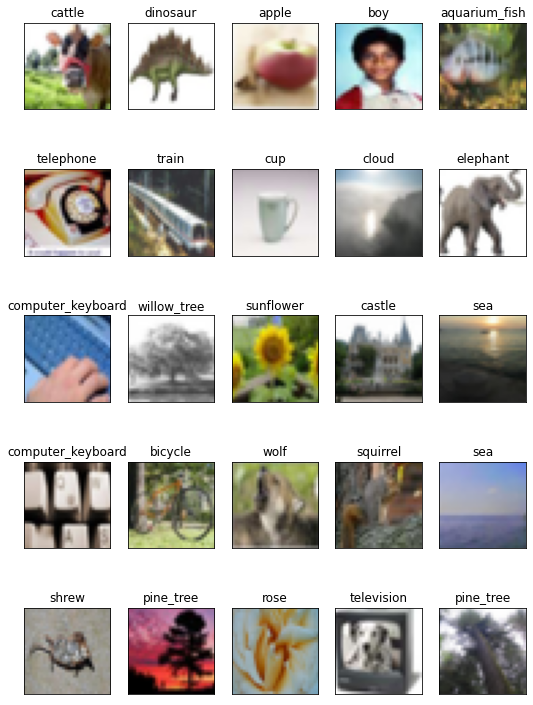

In [7]:
show_images(images = X,
            labels = y)

**Preprocessing**

In [8]:
# Normalize pixel value
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [9]:
# Encode label value
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, 100)
y_test = to_categorical(y_test, 100)

**Build Baseline Model**

In [10]:
# Create a function to build base model
def build_base_model():
  """
  Create a deep learning model with one Convolution Layer, one Pooling Layer.
  """

  # Create a model with Sequential API
  model = tf.keras.Sequential([

           tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (X.shape[1:])),
           tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
           
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(units = 64, activation = "relu"),
           tf.keras.layers.Dense(units = 100, activation = "softmax")
  ])

  # Return model
  return model

In [11]:
base_model = build_base_model()

In [12]:
# Look summary of the model
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
Total params: 531,748
Trainable params: 531,748
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [13]:
base_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [14]:
# Create a EarlyStopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

**Creating Our Own Validation Set**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.3,
                                                  random_state = 42)

**Fit the model to the data**

In [16]:
history_base = base_model.fit(x = X_train,
                              y = y_train,
                              batch_size = 32,
                              epochs = 100,
                              callbacks = [early_stopping],
                              validation_data = (X_val, y_val))

Epoch 1/100
1094/1094 [==============================] - 7s 6ms/step - loss: 4.2611 - accuracy: 0.0479 - val_loss: 3.9406 - val_accuracy: 0.0825
Epoch 2/100
1094/1094 [==============================] - 7s 6ms/step - loss: 3.7604 - accuracy: 0.1137 - val_loss: 3.6315 - val_accuracy: 0.1318
Epoch 3/100
1094/1094 [==============================] - 7s 6ms/step - loss: 3.5216 - accuracy: 0.1484 - val_loss: 3.5182 - val_accuracy: 0.1514
Epoch 4/100
1094/1094 [==============================] - 7s 6ms/step - loss: 3.3905 - accuracy: 0.1700 - val_loss: 3.3860 - val_accuracy: 0.1765
Epoch 5/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.2999 - accuracy: 0.1919 - val_loss: 3.3652 - val_accuracy: 0.1827
Epoch 6/100
1094/1094 [==============================] - 7s 6ms/step - loss: 3.2312 - accuracy: 0.2040 - val_loss: 3.3034 - val_accuracy: 0.1985
Epoch 7/100
1094/1094 [==============================] - 7s 6ms/step - loss: 3.1710 - accuracy: 0.2161 - val_loss: 3.2824 - val_ac

**Visualizing Fitting History**

In [17]:
# Create a function to visualize history of fitting operation
def plot_history(history):
  """
  Plots the given history.
  """

  fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 7))

  ax0.plot(history.history["accuracy"], color = "lightgreen", label = "Training accuracy")
  ax0.plot(history.history["val_accuracy"], color = "salmon", label = "Validation accuracy")
  ax0.set_xlabel("Epoch")
  ax0.set_ylabel("Accuracy")
  ax0.set_title("Training / Validation Accuracy")
  ax0.legend()

  ax1.plot(history.history["loss"], color = "lightgreen", label = "Training loss")
  ax1.plot(history.history["val_loss"], color = "salmon", label = "Validation loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss")
  ax1.set_title("Training / Validation Loss")
  ax1.legend()

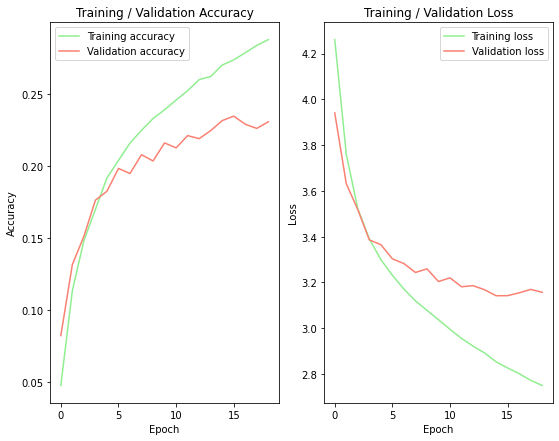

In [18]:
plot_history(history = history_base)

**Baseline model prediction**

In [19]:
base_preds = base_model.predict(X_test)
base_preds[0]

array([1.6156897e-05, 2.8278935e-04, 3.7039488e-03, 5.7473819e-04,
       3.0925535e-04, 3.7333800e-03, 9.7755568e-05, 2.8324223e-04,
       3.5389971e-03, 1.1643150e-03, 3.3837868e-04, 5.5198548e-03,
       4.9035288e-02, 3.3701767e-04, 1.7440889e-05, 2.2762271e-03,
       6.0600450e-04, 1.0164754e-03, 3.6996079e-04, 3.1718268e-04,
       3.7486339e-03, 4.4673568e-04, 4.1671528e-04, 5.3441111e-02,
       1.0910077e-03, 1.6950080e-03, 2.0532671e-04, 3.1082036e-03,
       1.7800508e-03, 3.3355209e-03, 1.5308550e-01, 2.5128119e-04,
       8.3648991e-03, 1.2569187e-05, 2.0317044e-04, 3.6113334e-03,
       2.8386313e-04, 1.1258913e-03, 1.7833362e-03, 1.7186681e-02,
       1.7998278e-02, 2.8848171e-03, 1.1548306e-04, 6.6343891e-06,
       5.3053782e-03, 8.1419141e-04, 6.7250622e-03, 5.4120814e-05,
       5.5532637e-05, 4.6378039e-02, 7.1210007e-04, 1.9596129e-04,
       7.7951590e-05, 4.7188760e-07, 6.4900523e-04, 9.6895983e-03,
       1.9565834e-02, 5.2679883e-05, 7.5492950e-04, 4.4864034e

**Visualizing Predictions**

In [20]:
# Create a function to show predictions
def show_predictions(images, labels, predictions):
  """
  Shows images, true label and predicted label.
  """

  plt.figure(figsize = (19, 13))

  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])

    true_label = image_labels[np.where(labels[i] == 1)[0][0]]
    predicted_label = image_labels[np.argmax(predictions[i])]

    if true_label == predicted_label:
      color = "green"
    else:
      color = "red"
    
    message = f"P: {predicted_label}  T: {true_label}"
    plt.title(message, color = color)
  
  plt.show();

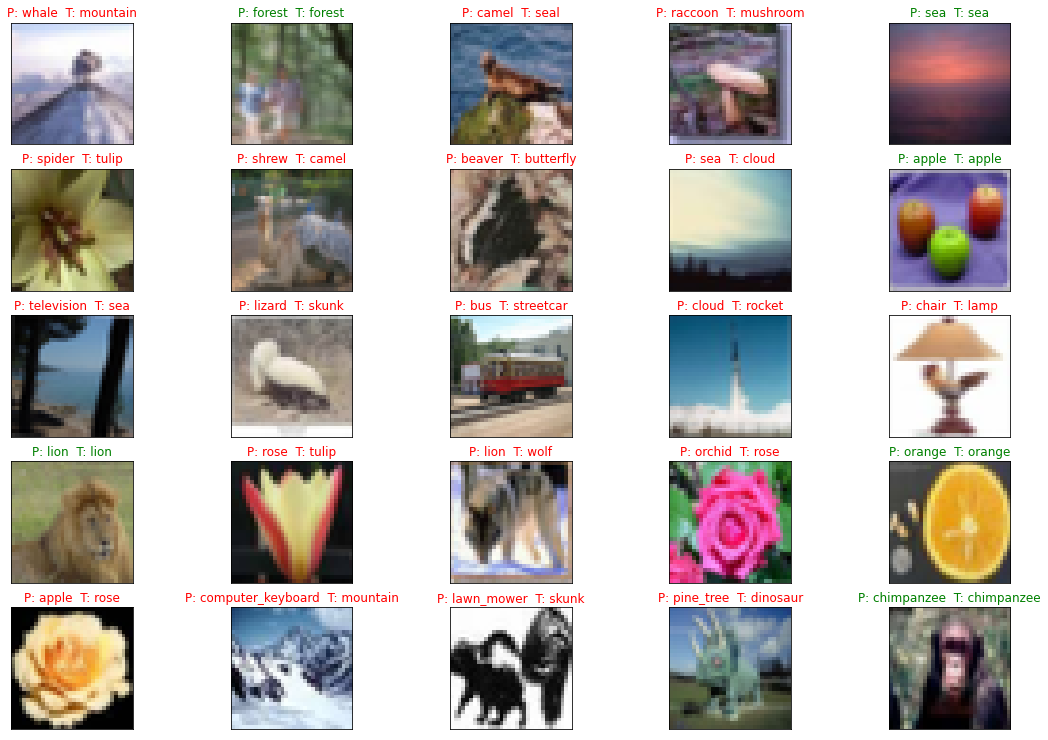

In [21]:
show_predictions(images = X_test,
                 labels = y_test,
                 predictions = base_preds)

**As you can see, our base model did not make a good job on the test set.**
**We have to improve our model and make it good job on the test set.**
**We are gonna apply more CNN architecture with dropout and batch normalization techniques.**
**Let's see the action!**

In [22]:
# Create a function to build robust CNN model
def build_robust_model():
  """
  Creates a deep learning model with CNN architecture, dropout and batch normalization techniques.
  """

  # Create a model with Sequential API
  model = tf.keras.Sequential([
           
          tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (X_train.shape[1:])),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units = 64, activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(units = 128, activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(rate = 0.2),
          tf.keras.layers.Dense(units = 100, activation = "softmax")
  ])

  # Return model
  return model

In [23]:
# Create robust model instance
robust_model = build_robust_model()

In [24]:
# Check summary of robust model
robust_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [25]:
# Compile the robust model
robust_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [26]:
# Fit the model to the data
history_robust = robust_model.fit(x = X_train,
                                  y = y_train,
                                  batch_size = 32,
                                  epochs = 100,
                                  callbacks = [early_stopping],
                                  validation_data = (X_val, y_val))

Epoch 1/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.9054 - accuracy: 0.1110 - val_loss: 3.4018 - val_accuracy: 0.1846
Epoch 2/100
1094/1094 [==============================] - 12s 11ms/step - loss: 3.2638 - accuracy: 0.2044 - val_loss: 2.9960 - val_accuracy: 0.2529
Epoch 3/100
1094/1094 [==============================] - 12s 11ms/step - loss: 2.9430 - accuracy: 0.2643 - val_loss: 2.7234 - val_accuracy: 0.3053
Epoch 4/100
1094/1094 [==============================] - 12s 11ms/step - loss: 2.7084 - accuracy: 0.3089 - val_loss: 3.0351 - val_accuracy: 0.2645
Epoch 5/100
1094/1094 [==============================] - 12s 11ms/step - loss: 2.5549 - accuracy: 0.3394 - val_loss: 2.6134 - val_accuracy: 0.3351
Epoch 6/100
1094/1094 [==============================] - 12s 11ms/step - loss: 2.4205 - accuracy: 0.3711 - val_loss: 2.5989 - val_accuracy: 0.3420
Epoch 7/100
1094/1094 [==============================] - 12s 11ms/step - loss: 2.3070 - accuracy: 0.3939 - val_loss: 2

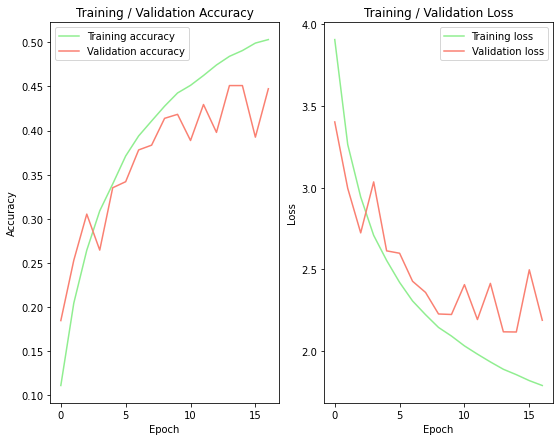

In [27]:
# Check the history plot
plot_history(history = history_robust)

**Prediction with more robust model on test set**

In [28]:
robust_preds = robust_model.predict(X_test)
robust_preds[0]

array([8.56262250e-06, 2.98191844e-05, 4.16794000e-03, 3.66283581e-04,
       1.66761409e-03, 1.91286163e-04, 8.26163311e-03, 2.06637569e-02,
       2.00644834e-03, 1.28834785e-04, 7.33451452e-05, 2.57004006e-03,
       4.59219515e-02, 2.58503187e-05, 9.25397399e-05, 9.64159772e-05,
       2.02527790e-05, 1.60657219e-04, 1.48977004e-02, 4.71513749e-06,
       3.57114259e-05, 3.63580999e-04, 1.99536662e-04, 4.41096723e-03,
       3.34618166e-02, 2.03823671e-04, 1.16329722e-03, 1.94423820e-03,
       9.21105966e-05, 5.38576918e-04, 3.87386493e-02, 3.38244463e-05,
       1.54355555e-04, 3.07573209e-05, 1.16297320e-04, 1.33247965e-03,
       1.53985035e-04, 1.65780890e-04, 2.84861919e-04, 1.02191530e-02,
       1.24735292e-02, 6.55429467e-05, 3.54345655e-04, 1.49798479e-05,
       2.92331167e-02, 8.69721931e-04, 6.28319196e-03, 7.01181052e-05,
       3.44609143e-04, 4.91394773e-02, 9.90580767e-04, 7.64535274e-04,
       3.38455138e-05, 4.97619731e-05, 3.21813533e-03, 4.71409969e-03,
      

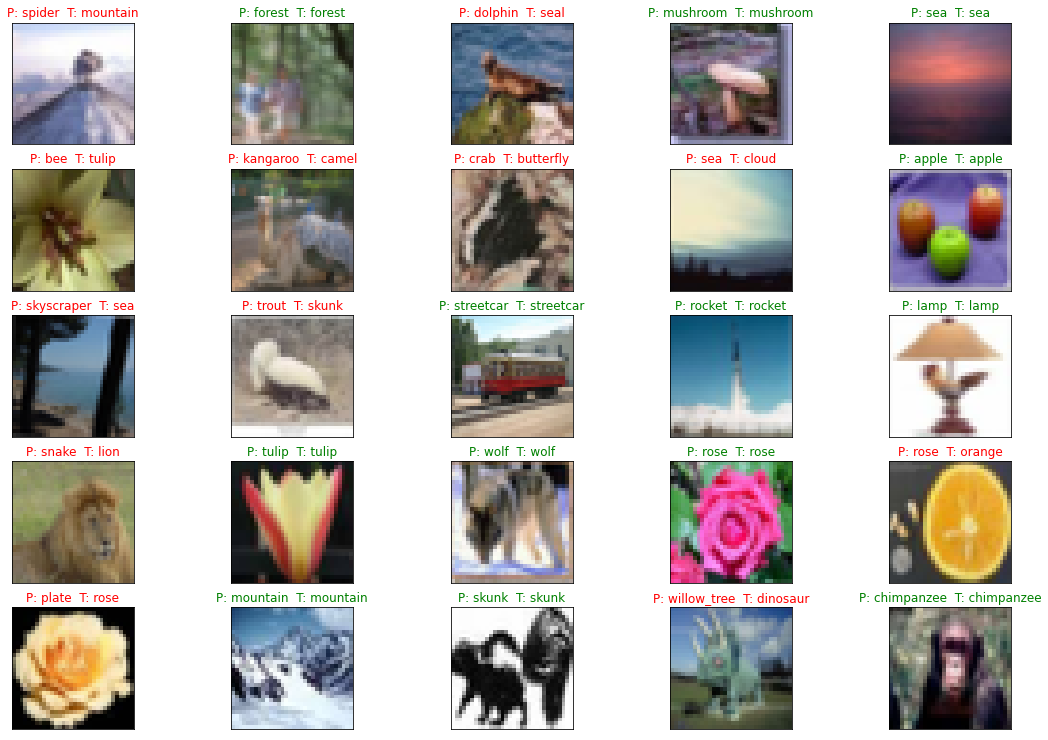

In [29]:
# Show the predictions
show_predictions(images = X_test,
                 labels = y_test,
                 predictions = robust_preds)

**As you can see, our model has been improved but it is still not enough. Let's try something different!**

In [30]:
data_augmentation = tf.keras.Sequential([
                    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)                    
])

In [31]:
sample_image = X_train[0]
sample_image = tf.expand_dims(sample_image, 0)

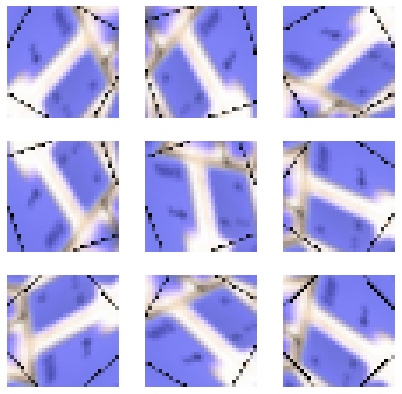

In [32]:
# Let's see some augmanted image
plt.figure(figsize = (7, 7))
for i in range(9):
  augmanted_image = data_augmentation(sample_image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmanted_image[0])
  plt.axis("off")

In [11]:
# Create a function to build deep learning model with data augmentation
def build_model_with_augmentation():
  """
  Builds a model with CNN + Data Augmentation techniques.
  """
  
  # Create a model with Sequential API
  model = tf.keras.Sequential([
           
          data_augmentation, 
          tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (X_train.shape[1:])),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          
          tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Dropout(rate = 0.2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units = 64, activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(units = 128, activation = "relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(rate = 0.2),
          tf.keras.layers.Dense(units = 100, activation = "softmax")
  ])

  # Return model
  return model

In [34]:
augmanted_model = build_model_with_augmentation()

In [35]:
augmanted_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [36]:
history_augmanted = augmanted_model.fit(x = X_train,
                                        y = y_train,
                                        batch_size = 32,
                                        epochs = 100,
                                        callbacks = [early_stopping],
                                        validation_data = (X_val, y_val))

Epoch 1/100
1094/1094 [==============================] - 13s 12ms/step - loss: 4.1595 - accuracy: 0.0717 - val_loss: 3.7611 - val_accuracy: 0.1171
Epoch 2/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.6882 - accuracy: 0.1283 - val_loss: 3.8339 - val_accuracy: 0.1466
Epoch 3/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.4867 - accuracy: 0.1601 - val_loss: 3.8478 - val_accuracy: 0.1239
Epoch 4/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.3653 - accuracy: 0.1818 - val_loss: 3.4629 - val_accuracy: 0.1659
Epoch 5/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.2730 - accuracy: 0.1977 - val_loss: 3.2844 - val_accuracy: 0.1972
Epoch 6/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.2094 - accuracy: 0.2087 - val_loss: 3.2199 - val_accuracy: 0.2123
Epoch 7/100
1094/1094 [==============================] - 13s 12ms/step - loss: 3.1473 - accuracy: 0.2212 - val_loss: 2

In [37]:
# Create a function to create training, validation and test data batches
BATCH_SIZE = 32 # According to Yann Lecun

def create_data_batches(X, y, batch_size = BATCH_SIZE, validation_data = False, test_data = False):
  """
  Creates data batches with given type and batch size.
  """

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.batch(batch_size)
    return data_batch

  elif validation_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.batch(batch_size)
    return data_batch

In [38]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, validation_data = True)

Creating training data batches...
Creating validation data batches...


In [39]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)))

**Visualizing Data Batches**

In [40]:
# Create a function for viewing images in a data batch
def show_data_batch(images, labels):
  """
  Displays 25 images from data batch.
  """

  plt.figure(figsize = (10, 10))

  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    index = np.where(labels[i] == 1)[0][0]
    plt.title(image_labels[index])
    plt.axis("off")

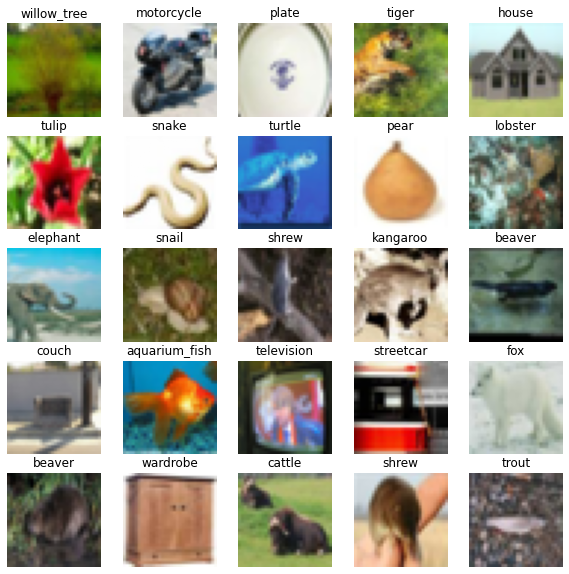

In [41]:
# To visualize our data batch, we have to unbatch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_data_batch(train_images, train_labels)

**Let's fit the model to the data**

In [42]:
history_batch = robust_model.fit(train_data,
                                 epochs = 100,
                                 callbacks = [early_stopping],
                                 validation_data = val_data)

Epoch 1/100
1094/1094 [==============================] - 13s 12ms/step - loss: 1.7586 - accuracy: 0.5124 - val_loss: 2.0849 - val_accuracy: 0.4567
Epoch 2/100
1094/1094 [==============================] - 13s 12ms/step - loss: 1.7301 - accuracy: 0.5190 - val_loss: 2.3134 - val_accuracy: 0.4193
Epoch 3/100
1094/1094 [==============================] - 12s 11ms/step - loss: 1.7176 - accuracy: 0.5224 - val_loss: 2.0806 - val_accuracy: 0.4618
Epoch 4/100
1094/1094 [==============================] - 12s 11ms/step - loss: 1.6841 - accuracy: 0.5272 - val_loss: 2.1785 - val_accuracy: 0.4471
Epoch 5/100
1094/1094 [==============================] - 13s 12ms/step - loss: 1.6556 - accuracy: 0.5396 - val_loss: 2.2620 - val_accuracy: 0.4295
Epoch 6/100
1094/1094 [==============================] - 12s 11ms/step - loss: 1.6348 - accuracy: 0.5399 - val_loss: 2.0485 - val_accuracy: 0.4719
Epoch 7/100
1094/1094 [==============================] - 12s 11ms/step - loss: 1.6194 - accuracy: 0.5449 - val_loss: 2

In [43]:
# Create test batch to make predictions
test_data = create_data_batches(X_test, y_test, test_data = True)

Creating test data batches...


In [44]:
batch_preds = robust_model.predict(test_data)

In [45]:
test_images, test_labels = next(test_data.as_numpy_iterator())

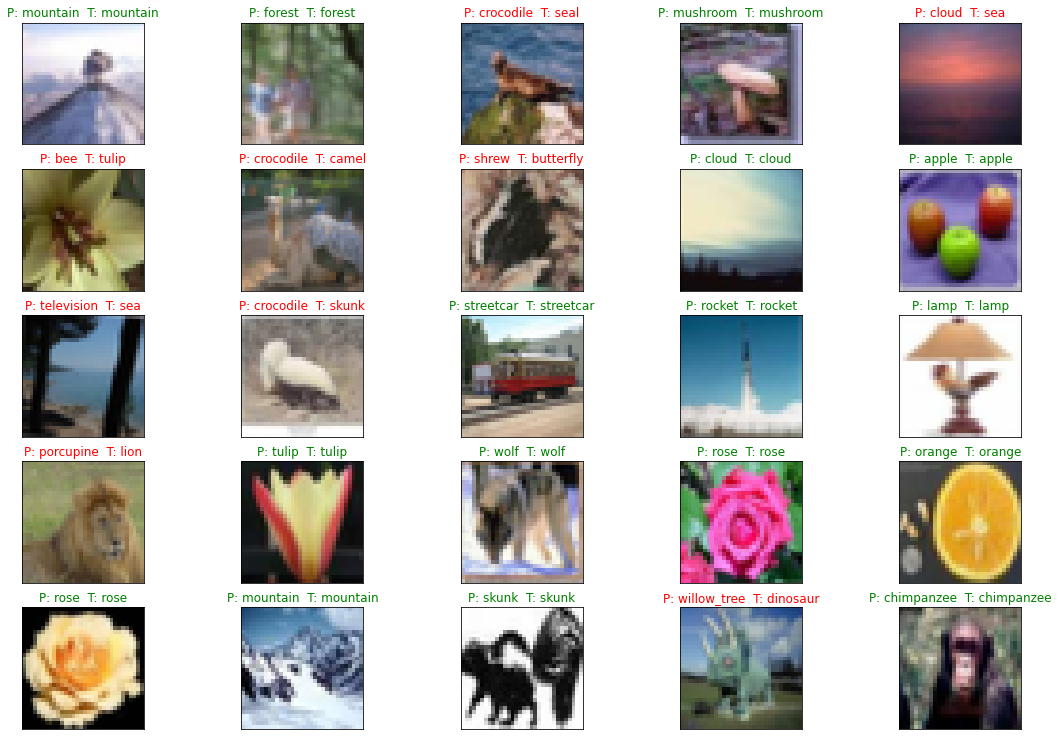

In [46]:
show_predictions(images = test_images,
                 labels = test_labels,
                 predictions = batch_preds)

**Now, time to try Transfer Learning!**

In [1]:
IMG_SIZE = 224
def resize(X, y):

  X = tf.image.resize(X, size = [IMG_SIZE, IMG_SIZE])

  return X, y

In [2]:
# Create a function to create training, validation and test data batches
BATCH_SIZE = 32 # According to Yann Lecun

def create_data_batches_transfer_learning(X, y, batch_size = BATCH_SIZE, validation_data = False, test_data = False):
  """
  Creates data batches with given type and batch size.
  """

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(resize).batch(batch_size)
    return data_batch

  elif validation_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(resize).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(resize).batch(batch_size)
    return data_batch

In [13]:
training_data = create_data_batches_transfer_learning(X_train, y_train)
validation_data = create_data_batches_transfer_learning(X_val, y_val, validation_data = True)

Creating training data batches...
Creating validation data batches...


In [14]:
training_data.element_spec, validation_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 100), dtype=tf.float32, name=None)))

In [15]:
# Specify some parameters for Transfer Learning model
# Set up input shape of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
# Set up output shape of the model
OUTPUT_SHAPE = 100
# Set up model URL from TensorflowHub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [16]:
import tensorflow_hub as hub

In [17]:
# Create a function to build and compile our transfer learning model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  
  print(f"Building model with: {model_url}")

  # Set up the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(model_url), # Input Layer
          tf.keras.layers.Dense(units = 100, activation = "softmax") # Output Layer
  ])

  # Compile the model
  model.compile(
      optimizer = tf.keras.optimizers.Adam(),
      loss = tf.keras.losses.CategoricalCrossentropy(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  # Return the model
  return model

In [18]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 100)               100200    
Total params: 5,532,913
Trainable params: 100,200
Non-trainable params: 5,432,713
_________________________________________________________________


In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

In [25]:
def train_model():

  # Create the model
  model = create_model()

  # Fit the model to the data
  model.fit(training_data,
            epochs = 100,
            callbacks = [early_stopping],
            validation_data = validation_data)
  return model

In [21]:
history = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
1094/1094 [==============================] - 155s 141ms/step - loss: 1.8205 - accuracy: 0.5323 - val_loss: 1.4683 - val_accuracy: 0.6094
Epoch 2/100
1094/1094 [==============================] - 154s 140ms/step - loss: 1.2756 - accuracy: 0.6523 - val_loss: 1.4794 - val_accuracy: 0.6175
Epoch 3/100
1094/1094 [==============================] - 154s 141ms/step - loss: 1.1345 - accuracy: 0.6859 - val_loss: 1.5016 - val_accuracy: 0.6259
Epoch 4/100
1094/1094 [==============================] - 154s 141ms/step - loss: 1.0417 - accuracy: 0.7058 - val_loss: 1.4901 - val_accuracy: 0.6297
Epoch 5/100
1094/1094 [==============================] - 154s 140ms/step - loss: 0.9769 - accuracy: 0.7218 - val_loss: 1.4879 - val_accuracy: 0.6377
Epoch 6/100
1094/1094 [==============================] - 154s 141ms/step - loss: 0.9255 - accuracy: 0.7364 - val_loss: 1.5541 - val_accuracy: 0.6348
Epoch 7/100
1